In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, root_mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv("dataset_Facebook.csv")

In [5]:
subset1=df[['Type','Category','Post Month']]
print(subset1.head())

     Type  Category  Post Month
0   Photo         2          12
1  Status         2          12
2   Photo         3          12
3   Photo         2          12
4   Photo         2          12


In [8]:
subset2=df[['Type','Category','comment']]
print(subset2.head())

     Type  Category  comment
0   Photo         2        4
1  Status         2        5
2   Photo         3        0
3   Photo         2       58
4   Photo         2       19


In [12]:
merged=pd.concat([subset1,subset2],axis=1)
merged

,Type,Category,Post Month,Type,Category,comment
0,Photo,2,12,Photo,2,4
1,Status,2,12,Status,2,5
2,Photo,3,12,Photo,3,0
3,Photo,2,12,Photo,2,58
4,Photo,2,12,Photo,2,19
...,...,...,...,...,...,...
495,Photo,3,1,Photo,3,5
496,Photo,2,1,Photo,2,0
497,Photo,1,1,Photo,1,4
498,Photo,3,1,Photo,3,7


In [14]:
merged.sort_values(by=['comment'],ascending=False)

,Type,Category,Post Month,Type,Category,comment
244,Photo,2,7,Photo,2,372
460,Photo,3,2,Photo,3,146
168,Photo,1,9,Photo,1,144
288,Photo,1,6,Photo,1,103
228,Photo,2,7,Photo,2,64
...,...,...,...,...,...,...
332,Photo,3,5,Photo,3,0
333,Photo,3,5,Photo,3,0
111,Photo,1,10,Photo,1,0
103,Photo,1,10,Photo,1,0


In [10]:
# Subset: Numerical columns
df_numerical = df.select_dtypes(include=['int64', 'float64'])
# Subset: Posts of type 'Photo'
df_photo = df[df['Type'] == 'Photo']
# Subset: Top 10 posts by Total Interactions
df_top10 = df.nlargest(10, 'Total Interactions')

In [13]:
# Split and merge on index to simulate a real-world scenario
df_part1 = df.iloc[:, :10]  # First 10 columns
df_part2 = df.iloc[:, 10:]  # Remaining columns
df_merged = pd.merge(df_part1, df_part2, left_index=True, right_index=True)

In [16]:
# Sort by Total Interactions descending
df_sorted = df.sort_values(by='Total Interactions', ascending=False)

In [18]:
# Transpose first 5 rows to inspect column-based data
df_transposed = df.head().transpose()

In [22]:
df_sorted

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334
379,111620,Photo,3,4,1,14,1.0,105632,147918,3984,2254,3391,48575,27328,1936,51,1998.0,128.0,2177
168,135428,Photo,1,9,3,10,0.0,41984,68290,3370,2420,4074,34802,20928,2126,144,1622.0,208.0,1974
460,92507,Photo,3,2,1,13,0.0,55520,665792,4544,3586,6624,648611,47488,3430,146,1546.0,181.0,1873
349,117764,Photo,3,5,5,13,0.0,81856,124753,3000,1637,2718,52477,27392,1756,45,1639.0,122.0,1806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,137020,Photo,1,10,4,9,1.0,1357,2453,37,37,55,2154,1120,32,0,0.0,0.0,0
417,104070,Photo,1,3,3,10,0.0,1874,2474,25,25,31,1483,1062,15,0,0.0,0.0,0
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,NaN,NaN,0
441,98195,Photo,1,3,5,4,1.0,1845,2670,9,9,9,1614,1008,9,0,0.0,0.0,0


In [20]:
import numpy as np
arr = np.array(df[['Post Month', 'Post Weekday']].head(6))
reshaped = arr.reshape(3, 4)
print(reshaped)
arr

[[12  4 12  3]
 [12  3 12  2]
 [12  2 12  1]]


array([[12,  4],
       [12,  3],
       [12,  3],
       [12,  2],
       [12,  2],
       [12,  1]], dtype=int64)

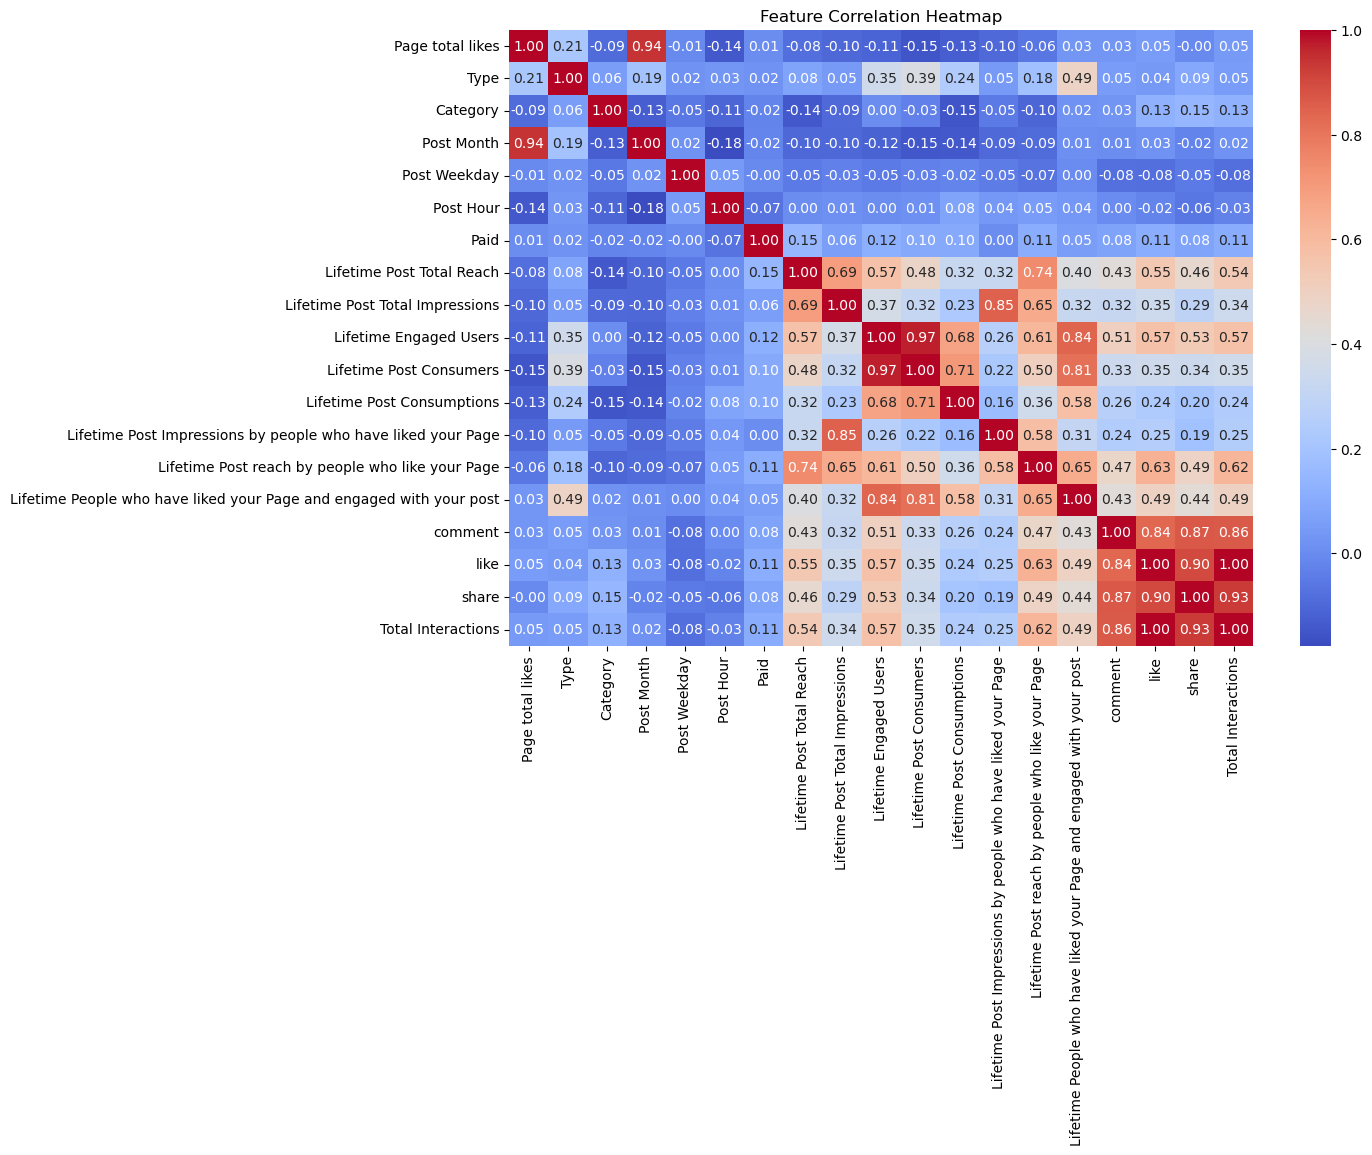

In [42]:
# 1. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

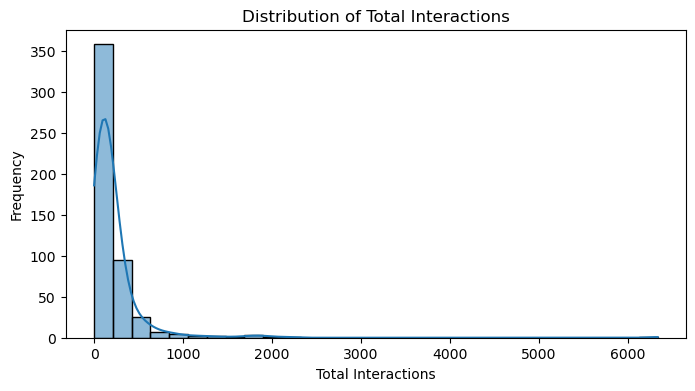

In [43]:
# 2. Distribution of Total Interactions
plt.figure(figsize=(8, 4))
sns.histplot(df["Total Interactions"], bins=30, kde=True)
plt.title("Distribution of Total Interactions")
plt.xlabel("Total Interactions")
plt.ylabel("Frequency")
plt.show()

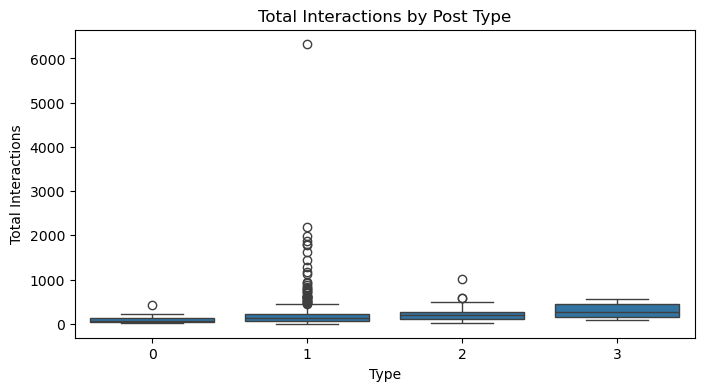

In [46]:
# 3. Boxplot by post type
plt.figure(figsize=(8, 4))
sns.boxplot(x="Type", y="Total Interactions", data=df)
plt.title("Total Interactions by Post Type")
plt.show()